<a href="https://colab.research.google.com/github/AndreesFernandes/Proyecto_Final-BD-ML-/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Emisiones de CO2 por año(toneladas métricas per cápita)


In [48]:
from google.colab import drive
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import plotly.express as px
import geopandas as gpd
from matplotlib.patches import Patch
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings("ignore")#elimino posibles advertencias

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
df = pd.read_csv("/content/drive/MyDrive/API_EN.ATM.CO2E.PC_DS2_es_csv_v2_6229363.csv",skiprows=1,header=1)# Cargar el CSV en un DataFrame

df = df.dropna(axis=1, how='all') #elimino las columnas vacias
df = df.dropna(subset=[df.columns[0]]) #elimino filas cuyo nombre de pais no este sea nulo
columnas_redundantes=["Indicator Name","Indicator Code"]
df = df.drop(columnas_redundantes, axis=1)#elimino columnas que tienen el mismo dato str en todo el df
df = df.dropna(subset=df.columns[2:], how='all')#elimino filas cuyos valores sean nulos en todos los años de muestreo
df

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Afganistán,AFG,0.191389,0.180674,0.126517,0.109106,0.096638,0.088781,0.082267,0.075559,...,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479
4,Angola,AGO,0.554941,0.545807,0.544413,0.710961,0.839266,0.914265,1.073630,1.086325,...,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743
5,Albania,ALB,1.844035,1.261054,0.689644,0.644008,0.649938,0.612055,0.621206,0.469831,...,1.768109,1.565921,1.656390,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550
6,Andorra,AND,7.592152,7.336725,7.099907,6.937048,6.663237,6.754132,7.082732,7.194088,...,6.957586,6.862293,6.674233,6.445931,6.485769,6.465288,6.302098,6.594057,6.287204,5.777148
7,El mundo árabe,ARB,2.799502,2.749432,2.911979,3.052821,3.149926,3.167200,3.202337,3.280785,...,4.209484,4.401209,4.386231,4.439511,4.450525,4.402999,4.350684,4.222333,4.181158,3.929078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Samoa,WSM,0.529176,0.579131,0.606011,0.656505,0.597318,0.666659,0.744144,0.723075,...,0.998212,0.999879,0.983800,1.027474,1.141125,1.200230,1.229109,1.185974,1.315212,0.960782
262,"Yemen, Rep. del",YEM,0.496616,0.611585,0.632544,0.570608,0.600495,0.654007,0.649987,0.680397,...,0.900866,0.801288,1.031167,0.988347,0.475240,0.342802,0.322370,0.368614,0.354864,0.308515
263,Sudáfrica,ZAF,6.209373,5.922276,5.717823,5.795258,5.826213,6.007616,6.136002,6.372629,...,7.808054,8.034649,8.116435,8.191153,7.607189,7.544590,7.683708,7.667377,7.688908,6.687563
264,Zambia,ZMB,0.356578,0.364978,0.352722,0.304005,0.252979,0.245217,0.197921,0.250242,...,0.213847,0.273340,0.278215,0.297755,0.305055,0.316995,0.393726,0.440527,0.414336,0.401903


In [50]:
df_head = pd.DataFrame({'Country Name': df['Country Name'],'Country Code':df['Country Code'], 'Suma Historica': df.iloc[:, 2:].sum(axis=1)})#creo df de historico emision de co2
df_head = df_head.sort_values(by='Suma Historica', ascending=False)#ordeno orden descendiente
df_head = df_head.reset_index(drop=True)#ignoro el indice
df_head

,Country Name,Country Code,Suma Historica
0,Qatar,QAT,1189.197407
1,Emiratos Árabes Unidos,ARE,772.705560
2,Kuwait,KWT,729.191715
3,Bahrein,BHR,683.835445
4,Luxemburgo,LUX,659.302421
...,...,...,...
232,Níger,NER,2.208312
233,Somalia,SOM,1.933786
234,República Centroafricana,CAF,1.505620
235,"Congo, República Democrática del",COD,1.337004


In [51]:

# Crear un mapa de calor con Plotly Graph Objects
fig = go.Figure(data=go.Choropleth(
    locations=df_head['Country Code'],
    z=df_head['Suma Historica'],
    colorscale="Viridis",
    reversescale= True,
    text=df_head['Country Code'],  # Puedes mostrar el nombre del país al pasar el ratón sobre cada área
    colorbar_title='Suma Historica'
))

# Configurar el diseño del mapa
fig.update_layout(
    title_text='Suma de valores por país',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

# Mostrar el mapa
fig.show()

In [52]:

df_head = df_head.head(10)#solo los 10 primeros
# Extraigo valores del dataFrame para realizar los graficos
Paises = df_head['Country Name'].values
NivelesCO = df_head['Suma Historica'] # elijo el año con mayores noveles a nivel global

# Creo el objeto figura
fig = go.Figure()


# Agrego al objeto figura un grafico de barra conn los valores extraidos previamente
fig.add_trace(go.Bar(
        x= Paises,
        y= NivelesCO,
        yaxis="y",
        name="Unidades vendidas",
        marker=dict(color="light blue")))


# Configuro titulos y ejes del grafico
fig.update_layout(
    title="Top 10 emisiones de CO2 (Suma historica)",
    xaxis=dict(title="Nombre País"),
    yaxis=dict(title="Niveles de CO2", side="left"))


# Muestro el grafico
fig.show()

In [53]:
# Selecciono la columna con los nombres de países y los años intercalados de a 5 para reducir el volumen de los datos.
df_reducido = df[["Country Name", "1990", "1993", "1999", "2003", "2007", "2012", "2015", "2020"]].sort_values(by='2012', ascending=False) # ordeno los valores de emisiones de mayor a menor(añp 2012)

df_reducido.head(10) # muestro los 10 paises con mayores niveles de emisiones

,Country Name,1990,1993,1999,2003,2007,2012,2015,2020
200,Qatar,28.399615,34.183536,47.288938,46.416887,40.609452,39.582140,35.290422,31.726842
127,Kuwait,17.390733,18.590810,24.363983,27.656833,28.163544,25.132421,22.775020,21.169610
22,Bahrein,20.752003,22.773170,22.323571,23.056822,22.105039,22.184125,22.385625,21.976908
8,Emiratos Árabes Unidos,29.055796,28.615418,27.660390,27.224873,22.448500,20.275652,21.914502,20.252272
144,Luxemburgo,29.553490,29.298195,18.398978,22.676970,23.155338,20.148942,16.034649,12.456953
31,Brunei Darussalam,12.447314,13.796701,13.554710,15.578528,18.860034,17.951032,15.180679,21.705812
13,Australia,15.437183,15.481705,17.737243,17.894539,18.454738,17.405618,16.198458,14.772658
182,Omán,6.605232,7.324646,9.504065,13.036889,16.219173,17.125738,16.730784,15.636201
205,Arabia Saudita,10.709518,11.388958,11.400494,12.303148,13.432443,15.978016,17.257793,14.266585
251,Estados Unidos,19.407336,19.218331,20.101123,19.506506,19.042912,15.789760,15.560015,13.032828


In [54]:
# creo un nuevo dataframe con los 10 países con mayores niveles de emisiones
paises_mayor_co2 = ['Qatar', 'Kuwait', 'Bahrein', 'Emiratos Árabes Unidos', 'Luxemburgo', 'Brunei Darussalam', 'Australia', 'Estados Unidos', 'América del Norte', 'Omán']
df_seleccionados = df_reducido[df_reducido['Country Name'].isin(paises_mayor_co2)]

df_seleccionados

,Country Name,1990,1993,1999,2003,2007,2012,2015,2020
200,Qatar,28.399615,34.183536,47.288938,46.416887,40.609452,39.582140,35.290422,31.726842
127,Kuwait,17.390733,18.590810,24.363983,27.656833,28.163544,25.132421,22.775020,21.169610
22,Bahrein,20.752003,22.773170,22.323571,23.056822,22.105039,22.184125,22.385625,21.976908
8,Emiratos Árabes Unidos,29.055796,28.615418,27.660390,27.224873,22.448500,20.275652,21.914502,20.252272
144,Luxemburgo,29.553490,29.298195,18.398978,22.676970,23.155338,20.148942,16.034649,12.456953
31,Brunei Darussalam,12.447314,13.796701,13.554710,15.578528,18.860034,17.951032,15.180679,21.705812
13,Australia,15.437183,15.481705,17.737243,17.894539,18.454738,17.405618,16.198458,14.772658
182,Omán,6.605232,7.324646,9.504065,13.036889,16.219173,17.125738,16.730784,15.636201
251,Estados Unidos,19.407336,19.218331,20.101123,19.506506,19.042912,15.789760,15.560015,13.032828
170,América del Norte,18.978058,18.766740,19.719693,19.276691,18.875620,15.781555,15.566170,13.088837


In [55]:


# Extraigo valores del dataFrame para realizar los graficos
Paises = df_seleccionados['Country Name'].values
NivelesCO = df_seleccionados['2003'] # elijo el año con mayores noveles a nivel global

# Creo el objeto figura
fig = go.Figure()


# Agrego al objeto figura un grafico de barra conn los valores extraidos previamente
fig.add_trace(go.Bar(
        x= Paises,
        y= NivelesCO,
        yaxis="y",
        name="Unidades vendidas",
        marker=dict(color="light blue")))


# Configuro titulos y ejes del grafico
fig.update_layout(
    title="Emisiones de CO2(año 2003)",
    xaxis=dict(title="Nombre País"),
    yaxis=dict(title="Niveles de CO2", side="left"))


# Muestro el grafico
fig.show()

In [56]:


# muestro en subplots ( 4 filas por dos columnas ) los 10 paises con mayores niveles de emisiones entre 1990 y 2020
fig = make_subplots(rows=4, cols=2,
      subplot_titles=("1990", "1993", "1999", "2003", "2007", "2012", "2015", "2020"))

fig.append_trace(go.Scatter(
    x= Paises,
    y=df_seleccionados['1990'],
), row=1, col=1)

fig.append_trace(go.Scatter(
    x= Paises,
    y=df_seleccionados['1993'],
), row=1, col=2)

fig.append_trace(go.Scatter(
    x= Paises,
    y=df_seleccionados['1999'],
), row=2, col=1)

fig.append_trace(go.Scatter(
    x= Paises,
    y=df_seleccionados['2003'],
), row=2, col=2)

fig.append_trace(go.Scatter(
    x= Paises,
    y=df_seleccionados['2007'],
), row=3, col=1)

fig.append_trace(go.Scatter(
    x= Paises,
    y=df_seleccionados['2012'],
), row=3, col=2)

fig.append_trace(go.Scatter(
    x= Paises,
    y=df_seleccionados['2015'],
), row=4, col=1)

fig.append_trace(go.Scatter(
    x= Paises,
    y=df_seleccionados['2020'],
), row=4, col=2)



fig.update_layout(height=1200, width=1600, title_text="Emisiones CO2 - 1990/2020")
fig.show()

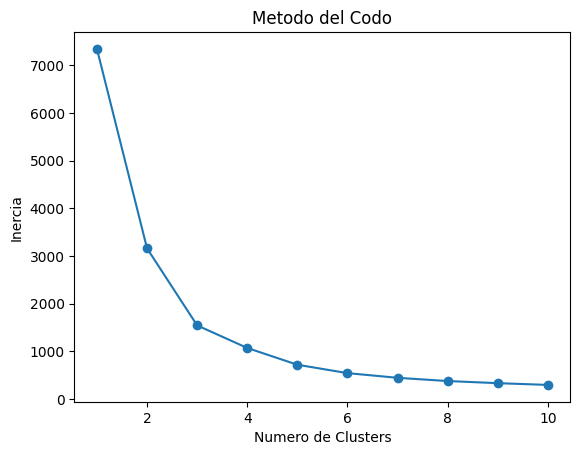

In [57]:

df_cluster = df

# Seleccionar solo las columnas numéricas (años) para el clustering
datos_cluster = df_cluster.iloc[:, 2:]

# Normalizar los datos utilizando StandardScaler
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(datos_cluster)

# Imputar los valores faltantes (NaN) con la media de cada columna
imputer = SimpleImputer(strategy='mean')
datos_normalizados_imputados = imputer.fit_transform(datos_normalizados)


inercias = []
# Probamos diferentes valores de clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(datos_normalizados_imputados)
    inercias.append(kmeans.inertia_)

# Graficamos los valores de las inercias
plt.plot(range(1, 11), inercias, marker='o')
plt.title('Metodo del Codo')
plt.xlabel('Numero de Clusters')
plt.ylabel('Inercia')
plt.show()

In [58]:
# Aplicar K-Means con los datos imputados
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(datos_normalizados_imputados)

# Añadir las etiquetas de los clusters al DataFrame
df_cluster['Cluster'] = kmeans.labels_

# Ver los resultados
print(df_cluster[['Country Name', 'Cluster']])

        Country Name  Cluster
2         Afganistán        3
4             Angola        3
5            Albania        3
6            Andorra        0
7     El mundo árabe        0
..               ...      ...
260            Samoa        3
262  Yemen, Rep. del        3
263        Sudáfrica        0
264           Zambia        3
265         Zimbabwe        3

[237 rows x 2 columns]


In [59]:
etiquetas_clusters = kmeans.labels_
silueta = silhouette_score(datos_normalizados_imputados, etiquetas_clusters)
print(f'Puntuación de silueta: {silueta}')

Puntuación de silueta: 0.5712497031833175


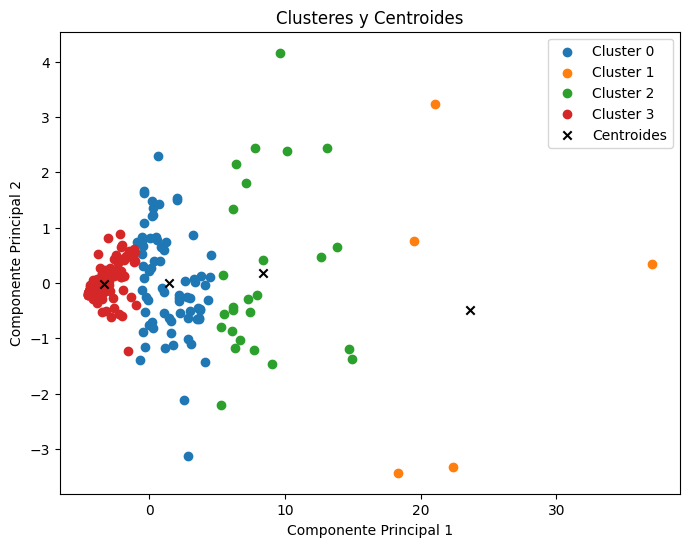

In [60]:
# Aplicamos PCA
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(datos_normalizados_imputados)

# Graficamos los clusters
plt.figure(figsize=(8, 6))

for cluster in range(4):
    plt.scatter(componentes_principales[df_cluster['Cluster'] == cluster][:, 0],
                componentes_principales[df_cluster['Cluster'] == cluster][:, 1],
                label=f'Cluster {cluster}')

# Graficamos los centroides de los clusters
centroides_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], marker='x', color='black', label='Centroides')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusteres y Centroides')
plt.legend()
plt.show()

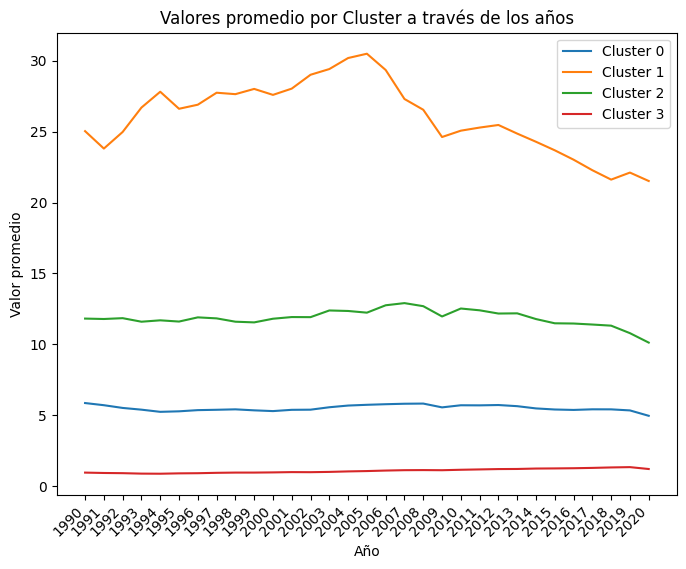

In [61]:
# Agrupar por Cluster y calcular la media
promedio_cluster = df_cluster.groupby('Cluster').mean()

# Graficar los valores medios
plt.figure(figsize=(8, 6))
for cluster in promedio_cluster.index:
    plt.plot(promedio_cluster.columns, promedio_cluster.loc[cluster], label=f'Cluster {cluster}')

plt.xlabel('Año')
plt.ylabel('Valor promedio')
plt.title('Valores promedio por Cluster a través de los años')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

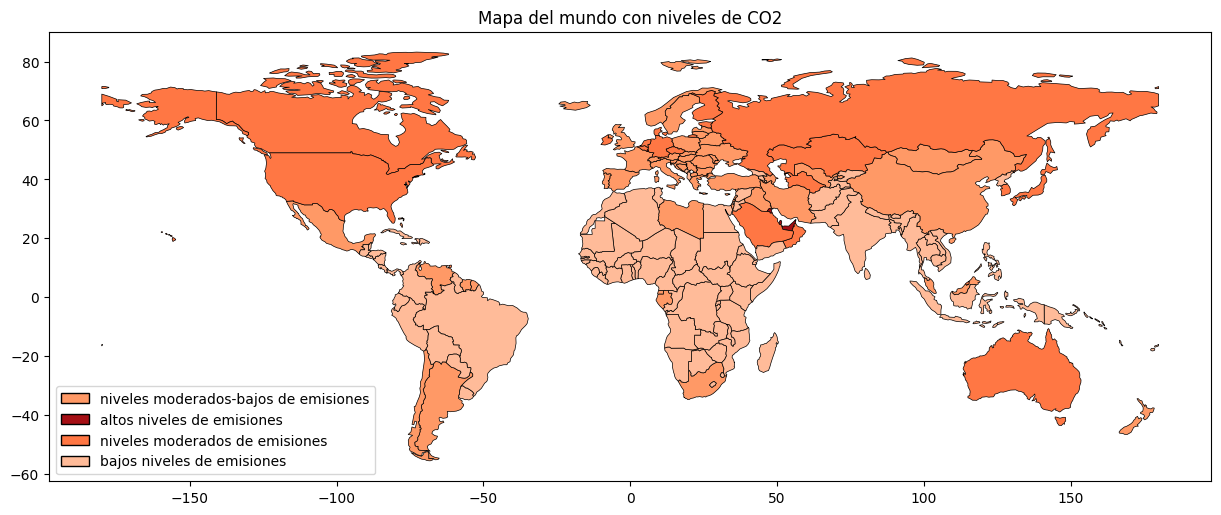

In [62]:
# Definir colores personalizados para cada clúster y su respectiva etiqueta
colors = {
    0: '#FF9966',
    1: '#A50F15',
    2: '#FF7744',
    3: '#FFBB99'
}

cluster_labels = {
    0: 'niveles moderados-bajos de emisiones',
    1: 'altos niveles de emisiones',
    2: 'niveles moderados de emisiones',
    3: 'bajos niveles de emisiones'
}

# Cargar el mapa base del mundo desde geopandas.datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Unir datos geográficos con información de clústeres
merged = world.merge(df_cluster, how='left', left_on='iso_a3', right_on='Country Code')

# Crear el mapa del mundo con colores según los clústeres asignados manualmente
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for cluster, color in colors.items():
    merged[merged['Cluster'] == cluster].plot(ax=ax, color=color, edgecolor='black', linewidth=0.5, label=cluster_labels[cluster])

# Crear leyenda personalizada
legend_elements = [Patch(facecolor=color, edgecolor='black', label=cluster_labels[cluster]) for cluster, color in colors.items()]
ax.legend(handles=legend_elements, loc='lower left')

plt.title('Mapa del mundo con niveles de CO2')
plt.show()